# BREAST CANCER PREDICTION
* [1. Intro](#introduction)
* [2. Importing required Libraries](#libraries)
* [3. Loading the Dataset file](#dataset)
* [4. Summarizing the Data](#summarize-data)
* [5. Evaluation of different Algorithms](#eval)
* [6. Data preperation](#prepare)
* [7. Best accuracy score model finalizing](#finalize-model)
* [8. Testing the finalized model](#test-model)
* [9. Conclusion](#conclusion)

# 1. Intro <a id="intro"></a>
A most common type of cancer, founded in women is breast cancer prediction. It originates from breast tissue<sup></sup>.

On the basis of the supplied feature set, the diagnosis is able to be classified as benign or malignant (cancer).


# 2. Importing Libraries <a class='anchor' id="libraries"></a>

This code imports the necessary libraries for model training, data preprocessing, and performance assessment.

* Pandas is a tool for analysing and manipulating data.
* To perform numerical calculations, utilise NumPy.
* Data visualisation is accomplished with Matplotlib.
* A more advanced Matplotlib interface called Seaborn is also employed for data visualisation.
* Python's Scikit-learn (sklearn) library for machine learning is used. It offers a variety of methods for handling data, such as preprocessing, model choice, and performance assessment.

The code imports both linear and non-linear models in terms of algorithms.

    Linear models include both linear discriminant analysis and logistic regression.
    Non-linear models include Support Vector Machines, Decision Trees, K-Nearest Neighbours, and Naive Bayes.

The code also imports metrics for measuring the accuracy, confusion matrix, and classification report of the model.



In [ ]:
# Import necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme(style='whitegrid')

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# The above code imports several libraries and algorithms from Scikit-learn, a popular machine learning library in Python.
# It also imports various metrics to evaluate the performance of the algorithms.


# 3. Loading Dataset <a id="dataset"></a>

In [ ]:
df = pd.read_csv(r'C:/Users/Azka/Downloads/FYP/data.csv')

df.head(10)


,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# 4. Summarizing the Data <a id='summarize-data'></a>

The shape of the DataFrame df, or the number of rows and columns in the dataset, is printed by this code. (Number of rows, Number of columns) will be the output format. This is an efficient method for quickly determining the size of your dataset.

Using the describe() method, the following code creates summary statistics for each column in the DataFrame df. Both numeric and non-numeric columns are guaranteed to be included in the summary by the include='all' parameter. The summary table that results is then transposed using the transpose() method to display the columns vertically rather than horizontally. This is a practical method for quickly gaining an overview of the value distribution in your dataset and for looking for any outliers or missing values.




In [ ]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
Texture_mean,569.0,NaN,NaN,NaN,19.296678,4.301816,9.71,16.17,18.87,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


The distribution of the target variable, diagnosis, is analysed by this code.

The diagnosis column's individual unique values are counted using the value_counts() method. The counts of each distinct value in the diagnosis column are then displayed using print() on this data.

The fraction of benign and malignant instances in the dataset is determined by the following two lines of code. Using print(), the ratio for each class is displayed.

The distribution of diagnosis values is then depicted in a bar chart using Seaborn's countplot() function. This is a practical method for checking for class imbalance and visualising the dataset's balance.

Counts of each diagnosis category:
B    357
M    212
Name: diagnosis, dtype: int64

Percentage of Benign cases: 62.74%
Percentage of Malignant cases: 37.26%


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

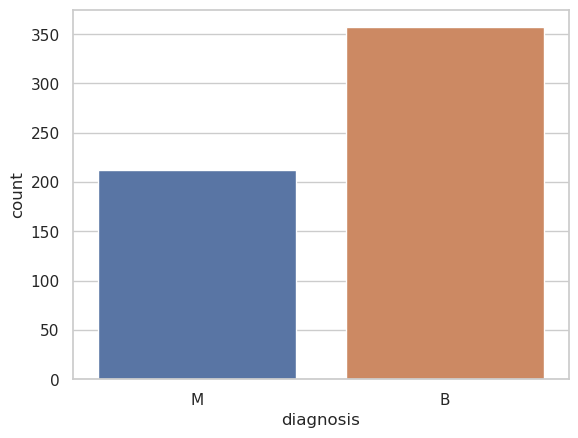

In [ ]:
# Display the counts of each diagnosis category in the 'diagnosis' column of the dataframe 'df'
print("Counts of each diagnosis category:")
print(df['diagnosis'].value_counts())

# Calculate the percentage of the Benign and Malignant cases in the 'diagnosis' column of the dataframe 'df'
b_percent = (df['diagnosis'].value_counts()[0] / len(df['diagnosis'])) * 100
m_percent = (df['diagnosis'].value_counts()[1] / len(df['diagnosis'])) * 100

# Print the percentage of Benign and Malignant cases
print('\nPercentage of Benign cases: %.2f%%' % b_percent)
print('Percentage of Malignant cases: %.2f%%' % m_percent)

# Create a count plot of the 'diagnosis' column in the dataframe 'df' using seaborn library
sb.countplot(x=df['diagnosis'])


With the exception of the goal variable diagnostic, this code generates a collection of density plots that display the distribution of each numerical feature in the dataset.The diagnosis column is eliminated from the DataFrame using the drop() technique. Then, using the parameters sharex=False to allow each plot to have its own x-axis scale, legend=True to display a legend for each plot, fontsize=1 to set the font size for the plot labels, and figsize=(16,24) to set the size of the overall figure, the plot() method is used to create density plots.

The set of density maps that are produced can be used to see how each numerical feature is distributed and to spot any outliers or skewness in the data.

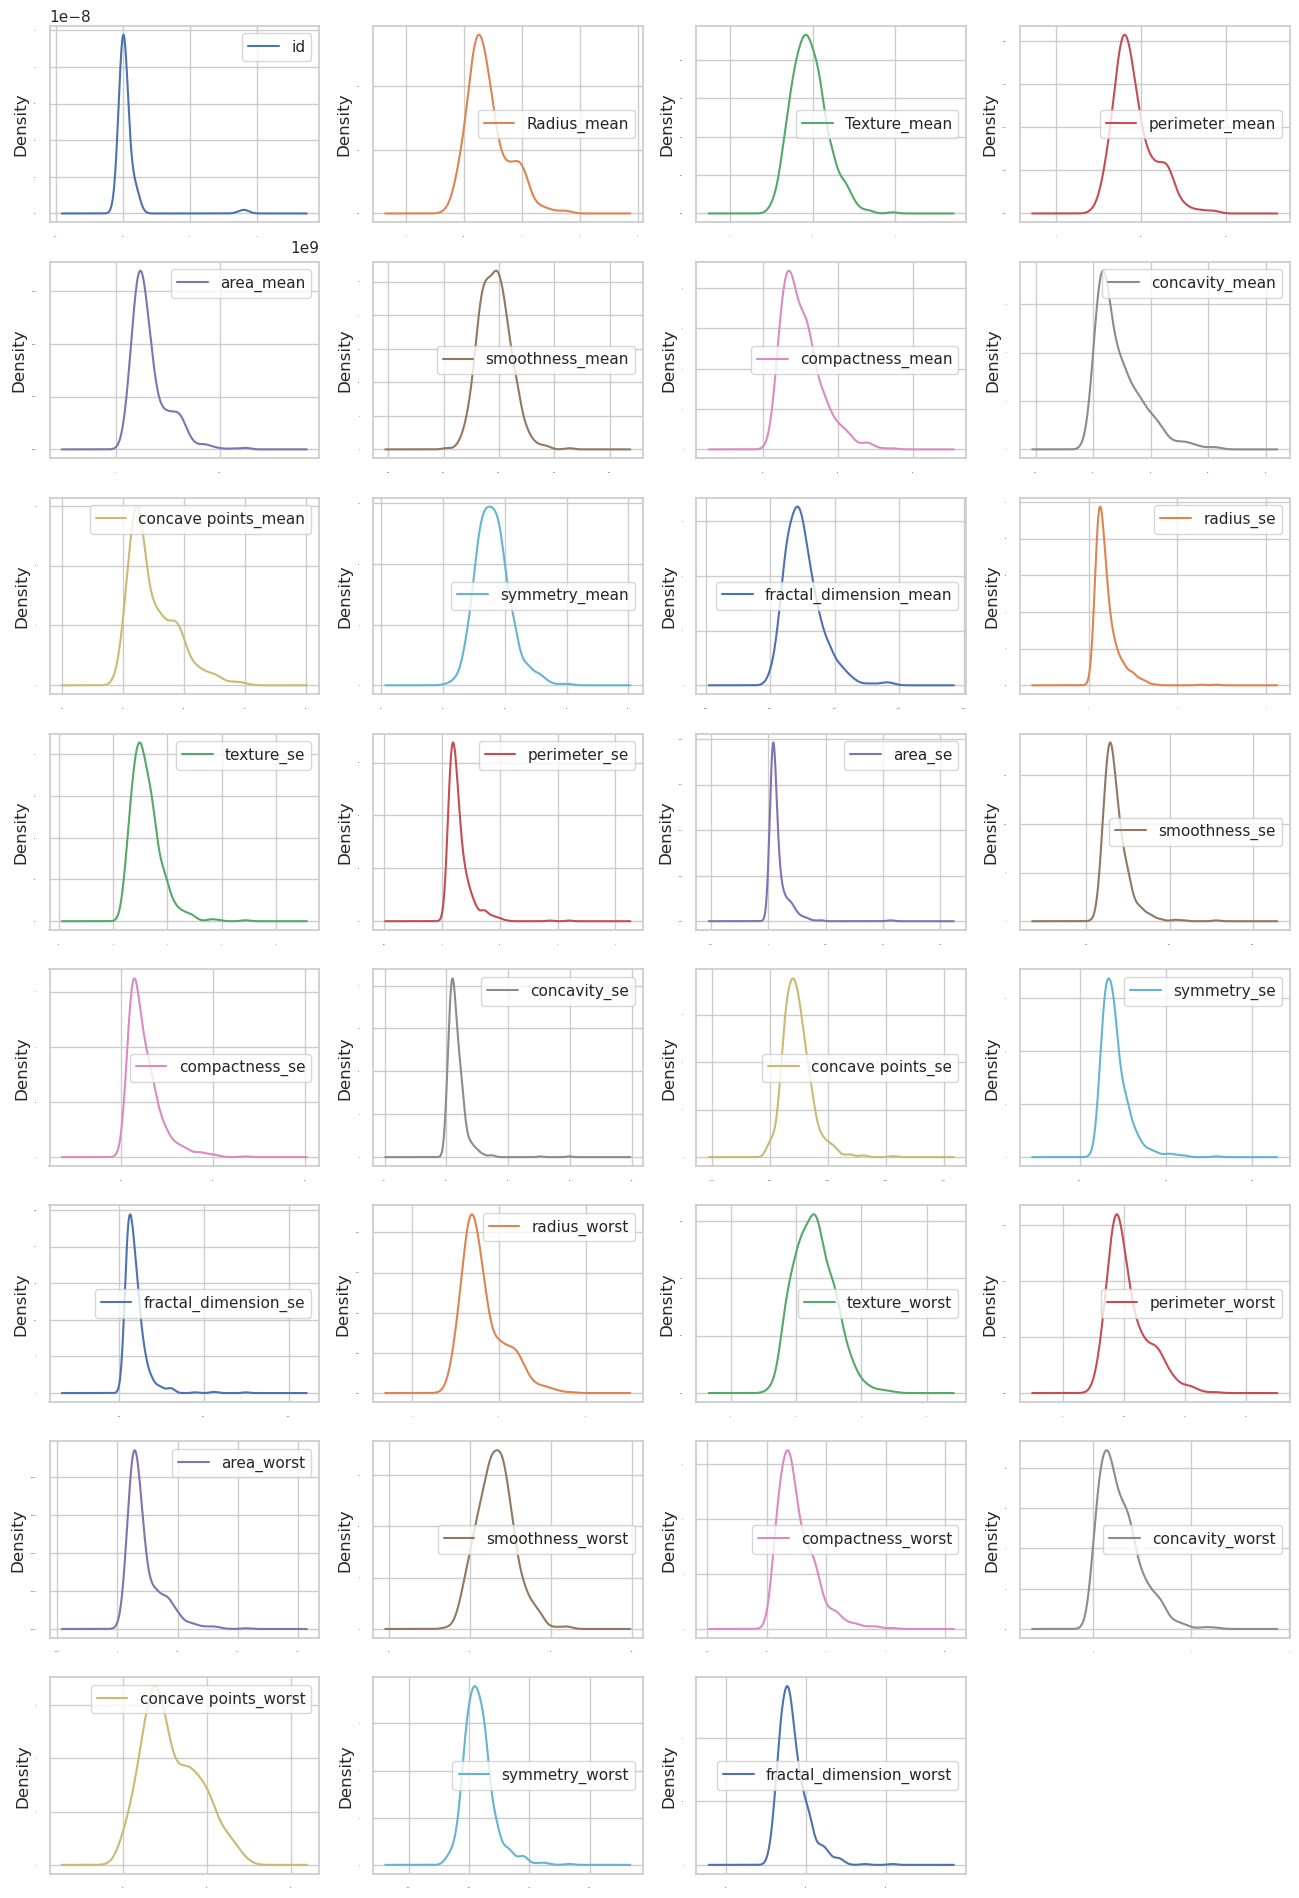

In [ ]:
# Check the distribution of the numerical features in the dataframe 'df', excluding the 'diagnosis' column
df.drop('diagnosis', axis=1).plot(kind='density', subplots=True, layout=(8,4), sharex=False, legend=True,
                                            fontsize=1, figsize=(16,24))
# Display the plot
plt.show()


With the exception of the id and diagnostic columns, this code generates a correlation matrix plot to display the correlations between each pair of numerical features in the dataset.

The id and diagnostic columns are eliminated from the DataFrame by using the drop() method. Next, the correlation coefficients between each pair of numerical features are determined using the corr() method. A color-coded plot is then used to display the resulting correlation matrix, with each cell's colour denoting the strength and direction of the connection between the respective pair of features.A new figure measuring 12 by 12 inches is made using the fig variable. Then, a new subplot is added to the figure using the add_subplot() method with the parameters 111 to designate a single plot that fills the entire figure. The actual correlation matrix plot is made using the matshow() method, with the parameters vmin=-1 and vmax=1 setting the colour scale's minimum and maximum values, respectively, to -1 and 1. The plot's grid lines can be disabled using the grid() function, and a colour scale can be added using the colorbar() method.

The set_xticks() and set_yticks() methods are used to set the tick positions for the appropriate axes, and the ticks variable is used to construct an array of tick locations for the plot's x- and y-axes. Using the column names of the original DataFrame, the set_xticklabels() and set_yticklabels() methods are used to set the labels for the tick locations on the x- and y-axes, respectively.

Strong correlations or multicollinearity between the numerical features can affect how well the machine learning algorithms employed in the analysis perform, and can be found using the correlation matrix plot that results from this analysis.


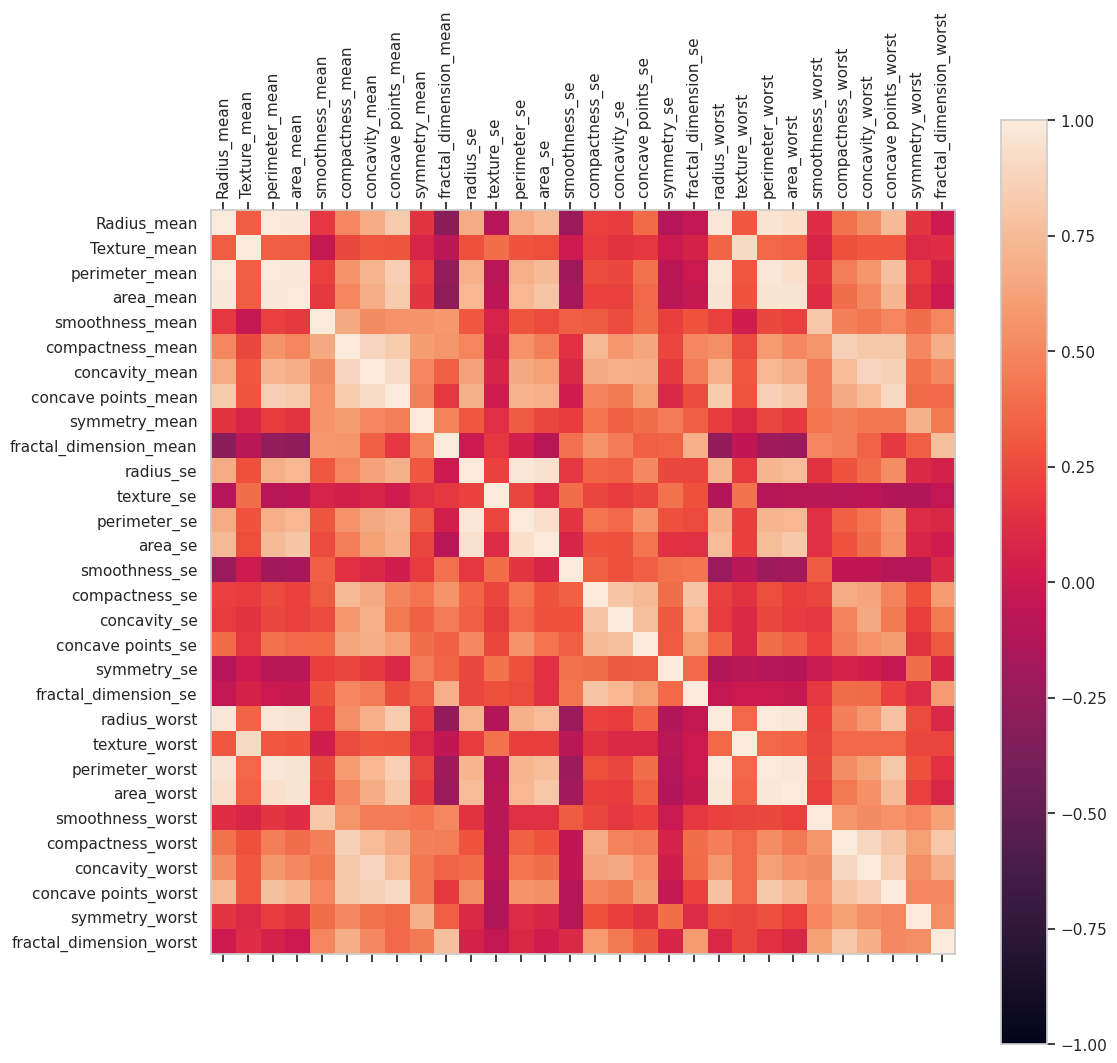

In [ ]:
# Check the correlation between the numerical features in the dataframe 'df', excluding the 'id' and 'diagnosis' columns
df_corr = df.drop(['id', 'diagnosis'], axis=1)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr(), vmin=-1, vmax=1, interpolation='none')
ax.grid(False)
fig.colorbar(cax)

# Set the ticks and labels for the x and y axis
ticks = np.arange(0, len(df_corr.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90)
ax.set_yticklabels(df_corr.columns)

# Display the plot
plt.show()


# 5. Algorithm Evaluation <a id='eval'></a>

This function assesses how well various algorithms work on the dataset. It accepts two inputs, x and y, which stand in for the dataset's features and target variable, respectively.

The function first generates a list of the names of the classification algorithms and then generates empty lists to store the algorithm names and results. The performance of each method is then assessed using k-fold cross-validation with 10 folds. For each algorithm, the mean accuracy and the standard deviation of the accuracy are printed.

In order to compare the outcomes of all the algorithms, it then makes a box plot. The box plot makes it easier to see how each method performs and to evaluate it against other algorithms.

In [ ]:
# Set the constants for training and evaluation options
seed = 101
n_fold = 10
scr = 'accuracy'

# Define a function to evaluate different machine learning algorithms on the data
def evaluate_algorithms(x, y):
    # Define the algorithms to be evaluated
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('GN', GaussianNB()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('SVC', SVC()))

    # Initialize arrays to store the results
    names = []
    results = []

    # Evaluate each algorithm using k-fold cross-validation
    for name, model in models:
        kfold = KFold(n_splits=n_fold, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scr)
        results.append(cv_results)
        names.append(name)
        msg = '%s - Mean accuracy: %.2f%%, Standard Deviation: (%.2f)' % (name, (cv_results.mean() * 100), cv_results.std())
        print(msg)

    # Plot the results using a boxplot
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Algorithm Comparison', fontsize=16, y=0.93)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names, fontsize=14)
    plt.show()


# 6. Prepare Data <a id='prepare'></a>

In [ ]:
df = df.drop('id', axis=1)
print(df.shape)

(569, 31)


The classes 'B' and 'M' in the dataframe 'df's 'diagnostic' column are mapped to 0 and 1 by this code, respectively.
The first five values of the "diagnosis" column with the mapped values would be displayed in the output of df['diagnosis'].head().

In [ ]:
# Map the classes
dt_map = {'B':0, 'M':1}
df['diagnosis'] = df['diagnosis'].map(dt_map)
df['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## 6.1. Drop Duplicates

In [ ]:
nr_rows = df.shape[0]
print('Number of rows: %d' % nr_rows)
df = df.drop_duplicates().reset_index(drop=True)
print('Number of dropped rows: %d' % (nr_rows - df.shape[0]))
print('Number of remainin rows: %d' % df.shape[0])

Number of rows: 569
Number of dropped rows: 0
Number of remainin rows: 569


## 6.2. Train Test Split

In [ ]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

labeler = LabelEncoder()
y_cat = labeler.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=seed)

LR - Mean accuracy: 94.08%, Standard Deviation: (0.04)
LDA - Mean accuracy: 95.61%, Standard Deviation: (0.03)
KNN - Mean accuracy: 92.54%, Standard Deviation: (0.03)
GN - Mean accuracy: 94.07%, Standard Deviation: (0.04)
CART - Mean accuracy: 92.30%, Standard Deviation: (0.04)
SVC - Mean accuracy: 90.99%, Standard Deviation: (0.03)


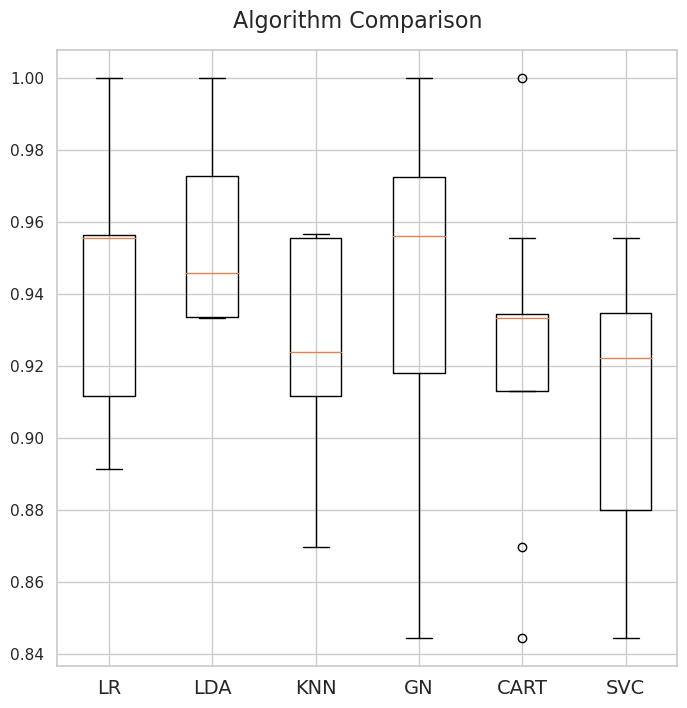

In [ ]:
# Evaluating algorithms for the baseline
import warnings
warnings.filterwarnings('ignore')
evaluate_algorithms(x_train, y_train)

## 6.3. Scaling Data

In [ ]:
scaler = MinMaxScaler()
fit = scaler.fit(x_train)
x_scaled = fit.transform(x_train)

LR - Mean accuracy: 96.94%, Standard Deviation: (0.03)
LDA - Mean accuracy: 95.61%, Standard Deviation: (0.03)
KNN - Mean accuracy: 97.15%, Standard Deviation: (0.02)
GN - Mean accuracy: 94.29%, Standard Deviation: (0.04)
CART - Mean accuracy: 91.22%, Standard Deviation: (0.05)
SVC - Mean accuracy: 97.82%, Standard Deviation: (0.02)


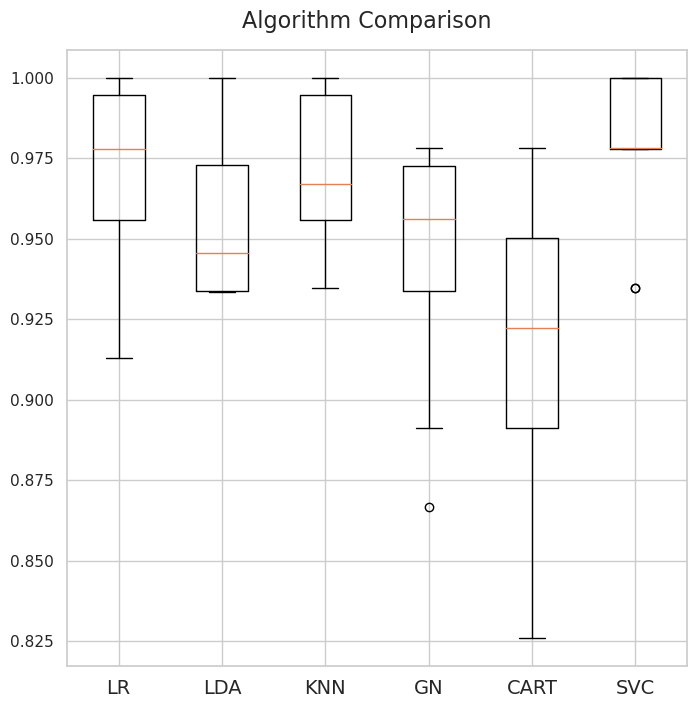

In [ ]:
evaluate_algorithms(x_scaled, y_train)

# 7. Finalize Model <a id='finalize-model'></a>

In [ ]:
hyperparameters = {'C': [0.1,1, 10, 100],
'gamma': [1,0.1,0.01,0.001],
'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=kfold)
grid_search.fit(x_scaled, y_train)

print('Best accuracy score: %.2f%%' % (grid_search.best_score_*100))
print('Best parameters', grid_search.best_params_)

Best accuracy score: 98.02%
Best parameters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# 8. Test Model <a id='test-model'></a>

In [ ]:
# First we need train the model to test it
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(x_scaled, y_train)

SVC(C=10, gamma=0.1)

In [ ]:
predictions = model.predict(fit.transform(x_test))
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

Accuracy score: 98.25%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



The confusion matrix is a useful approach to see how well the model predicted the classes. The samples that were successfully classified are shown by the diagonal, whereas the samples that were wrongly classified are shown by the off-diagonal. With only 4.4% of the data misclassified in this scenario, the model did reasonably well. The heatmap demonstrates that false positives (inaccurate cancer predictions) outnumbered false negatives (missing cancer diagnosis). The imbalanced dataset, which contains more benign samples than malignant ones, is probably to blame for this.

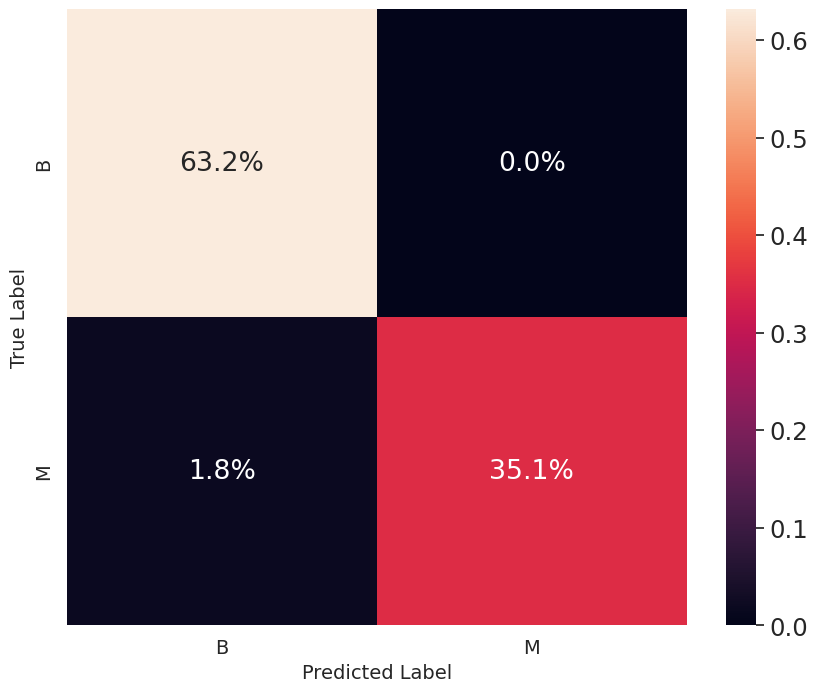

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
fig, ax = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cm/np.sum(cm), annot=True, fmt='.1%', ax=ax)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14)
ax.set_ylabel('True Label', fontsize=14)
ax.set_yticklabels(['B', 'M'], fontsize=14)
plt.show()


# 9. Conclusion <a id='conclusion'></a>

The goal of this study was to develop a model that could determine if a tumour was benign or malignant depending on the characteristics provided. With the given hyper-parameters, the SVC offered the highest accuracy rating. Additionally, we noticed that scaling the data enhanced the algorithm's performance for the test dataset.
Outliers can be eliminated as a following step to see if performance is improved or not.



Best accuracy score: 97.73%
Best parameters {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy score: 99.12%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



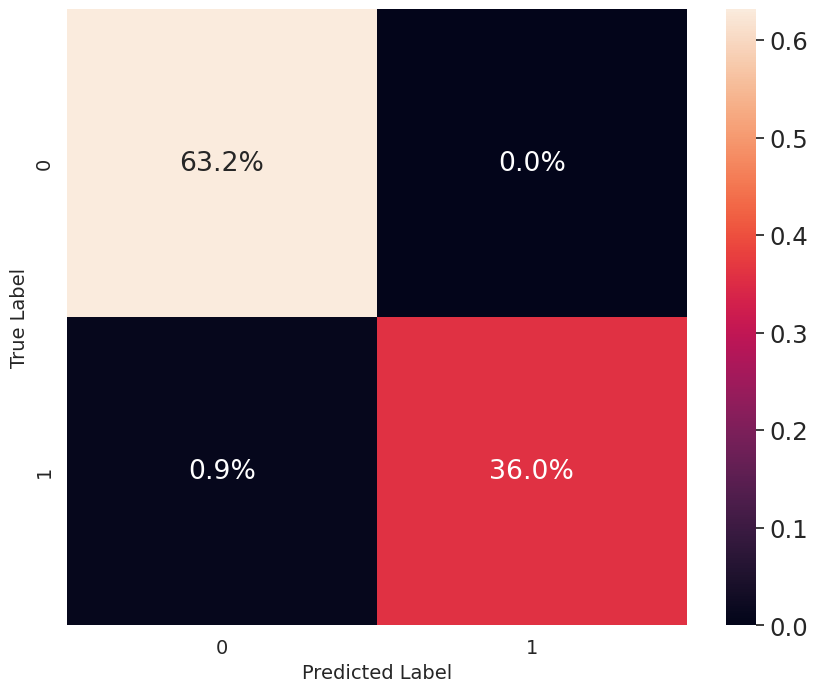

In [ ]:
from scipy.stats import zscore

# Remove outliers using Z-score method
z_scores = zscore(x_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
x_train_no_outliers = x_train[filtered_entries]
y_train_no_outliers = y_train[filtered_entries]

# Scale the features
scaler = MinMaxScaler()
fit = scaler.fit(x_train_no_outliers)
x_scaled_no_outliers = fit.transform(x_train_no_outliers)

# Perform hyper-parameter tuning
h_params = {'C': [0.1,1, 10, 100],
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']}
model = SVC()
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=h_params, cv=kfold)
grid.fit(x_scaled_no_outliers, y_train_no_outliers)

print('Best accuracy score: %.2f%%' % (grid.best_score_*100))
print('Best parameters', grid.best_params_)

# Train the model and make predictions
model = SVC(C=10, gamma=0.1, kernel='rbf')
model.fit(x_scaled_no_outliers, y_train_no_outliers)
predictions = model.predict(fit.transform(x_test))
print('Accuracy score: %.2f%%' % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))

# Plot the confusion matrix
cf_matrix = confusion_matrix(y_test, predictions)
fig = plt.subplots(figsize=(10, 8))
sb.set(font_scale=1.6)
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [ ]:
test_accuracy = accuracy_score(y_test, predictions) * 100
print('Accuracy score: %.2f%%' % test_accuracy)

Accuracy score: 99.12%


It is very unlikely to achieve 100% accuracy in any real-world problem, especially in a classification problem where the data may have noise or overlapping features. There will always be some amount of error or misclassification. Additionally, there may be limitations to the model, such as overfitting to the training data or not being able to capture all the relevant information in the features. Therefore, it is important to aim for high accuracy while also considering other performance metrics and ensuring the model is reliable and robust.

It's highly unlikely that removing more outliers will result in achieving 100% accuracy. In fact, it's generally not recommended to aim for 100% accuracy as it can lead to overfitting and a model that won't generalize well to new data.

It's important to find a balance between achieving a high level of accuracy and ensuring that the model is not overfitting to the training data. Additionally, it's important to consider other metrics besides accuracy, such as precision, recall, and F1 score, to get a more complete understanding of the model's performance.